# Analyzing COVID-19 data

The notebook below has been created in a hurry, no guarantee at all. Doublecheck all computations etc. before 

The data is dynamically imported from https://raw.githubusercontent.com/CSSEGISandData

Read their terms of use! Last time I checked it, it is strictly for public use in academic or research purposes.

## Import data

In [96]:
import pandas as pd

raw_types = [ "Confirmed", "Recovered", "Deaths" ]

raw_urls = {}
raw_urls["Confirmed"] = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
raw_urls["Recovered"] = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
raw_urls["Deaths"] = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"

raw_df = {}
for raw_type in raw_types:
    raw_df[raw_type] = pd.read_csv(raw_urls[raw_type])


Let's have a look which province/states and countries/regions are included. Only a part of the list is shown.

In [97]:
raw_df[raw_types[0]][~pd.notnull(raw_df[raw_types[0]]['Province/State'])]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,1,1,1,2,2,2,3,3,5,7
10,NaN,Sri Lanka,7.0000,81.0000,0,0,0,0,0,1,...,1,1,1,1,1,1,2,2,6,10
11,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,...,482,670,799,1040,1176,1457,1908,2078,3675,4585
12,NaN,Finland,64.0000,26.0000,0,0,0,0,0,0,...,12,15,15,23,30,40,59,59,155,225
13,NaN,United Arab Emirates,24.0000,54.0000,0,0,0,0,0,0,...,29,29,45,45,45,74,74,85,85,85


# Adaptation

Via the following list you can adapt which countries to be analyzed. 

Note: For some countries (e.g. China, United States), the input data is further decomposed into provinces/states. These countries are not yet supported here.

In [98]:
countries = [ 'Germany', 'Italy', 'Iran', 'Austria', 'Spain' ]

Check that all countries have accociated data.

In [99]:
remove_states = raw_df[raw_types[0]][~pd.notnull(raw_df[raw_types[0]]['Province/State'])]
for country in countries:    
    filtered = remove_states.loc[remove_states['Country/Region'].eq(country)]
    if (filtered.empty):
        raise ValueError("Country "+country+" not found in input data.")           

## Convert Data

In [100]:
def extract_values(df):
    filtered = df[~pd.notnull(df['Province/State']) & df['Country/Region'].eq(country)]
    transposed = filtered.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).transpose()
    values = transposed[transposed.columns[0]]
    return values

all = {}
for country in countries:
    dates = raw_df[raw_types[0]].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).transpose().index.tolist()
    data = {}
    for raw_type in raw_types:
        values = extract_values(raw_df[raw_type])
        data[raw_type] = values
    all[country] = pd.DataFrame(data, index=dates)

Show intermediate data.

In [101]:
all[countries[0]].tail(10)

,Confirmed,Recovered,Deaths
3/5/20,482,16,0
3/6/20,670,17,0
3/7/20,799,18,0
3/8/20,1040,18,0
3/9/20,1176,18,2
3/10/20,1457,18,2
3/11/20,1908,25,3
3/12/20,2078,25,3
3/13/20,3675,46,7
3/14/20,4585,46,9


## Enrich data

Enrich by computing Active = Confirmed - (Recovered + Deaths)

In [102]:
for country in countries:
    all[country]["Active"] = all[country]["Confirmed"] - (all[country]["Recovered"] + all[country]["Deaths"])

raw_types_ext = raw_types
raw_types_ext.append("Active")

Enrich by computing the rate and moving average on rate.

In [103]:
def addRate(df, label):
    df[label+" Rate"] = df[label].pct_change()
    
def addMovAverage(df, label, window_size):
    df[label+" Avg"] = df[label].rolling(window=window_size,center=False).mean()

window_size = 10
for country in countries:
    for raw_type in raw_types_ext:
        addRate(all[country], raw_type)
        addMovAverage(all[country], raw_type+" Rate", window_size)

Show part of final data.

In [104]:
all[countries[0]].tail(10)

,Confirmed,Recovered,Deaths,Active,Confirmed Rate,Confirmed Rate Avg,Recovered Rate,Recovered Rate Avg,Deaths Rate,Deaths Rate Avg,Active Rate,Active Rate Avg
3/5/20,482,16,0,466,0.839695,0.432153,0.000000,0.013810,NaN,NaN,0.894309,0.861904
3/6/20,670,17,0,653,0.390041,0.464907,0.062500,0.020060,NaN,NaN,0.401288,0.852033
3/7/20,799,18,0,781,0.192537,0.425337,0.058824,0.018799,NaN,NaN,0.196018,0.571635
3/8/20,1040,18,0,1022,0.301627,0.385130,0.000000,0.012132,NaN,NaN,0.308579,0.452493
3/9/20,1176,18,2,1156,0.130769,0.393859,0.000000,0.012132,inf,NaN,0.131115,0.458938
3/10/20,1457,18,2,1437,0.238946,0.353170,0.000000,0.012132,0.000000,NaN,0.243080,0.386371
3/11/20,1908,25,3,1880,0.309540,0.319567,0.388889,0.051021,0.500000,NaN,0.308281,0.336246
3/12/20,2078,25,3,2050,0.089099,0.306169,0.000000,0.051021,0.000000,NaN,0.090426,0.319850
3/13/20,3675,46,7,3622,0.768527,0.359752,0.840000,0.135021,1.333333,NaN,0.766829,0.370659
3/14/20,4585,46,9,4530,0.247619,0.350840,0.000000,0.135021,0.285714,NaN,0.250690,0.359061


## Plot data

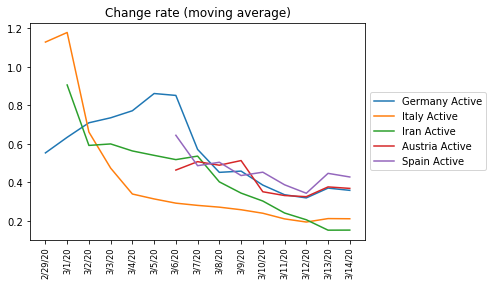

In [110]:
import matplotlib.pyplot as plt
import numpy as np

number_of_days = 15

for country in countries:
    ts = all[country]["Active Rate Avg"].tail(number_of_days)
    pl = ts.plot(label=country+" Active")
    
    # Uncomment the following to add all lines in one figure
    #cl = plt.gca().lines[-1].get_color()    
    #ts = all[country]["Deaths Rate Avg"].tail(number_of_days)
    #ts.plot(label=country+" Deaths", linestyle='dashed', color=cl)

plt.title("Change rate (moving average)")
plt.xticks(np.arange(number_of_days), all[country].tail(number_of_days).index.tolist(), 
           fontsize='small', rotation='vertical')
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


The y-axis shows the daily growth in percentage, e.g. 0.4 means that 40% more cases have been reported.

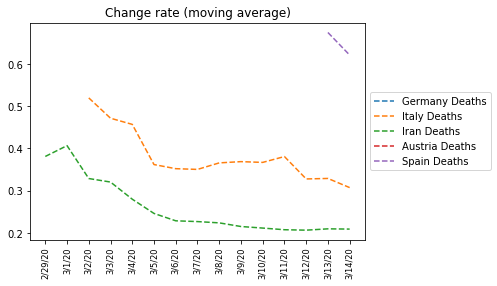

In [115]:
for country in countries:
    ts = all[country]["Deaths Rate Avg"].tail(number_of_days)
    ts.plot(label=country+" Deaths", linestyle='dashed')
    
plt.title("Change rate (moving average)")
plt.xticks(np.arange(number_of_days), all[country].tail(number_of_days).index.tolist(), 
           fontsize='small', rotation='vertical')
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Diagram per Country

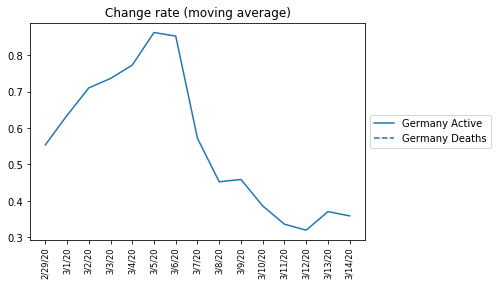

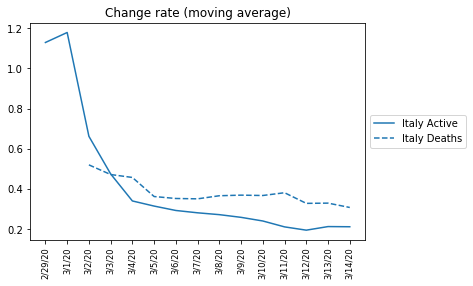

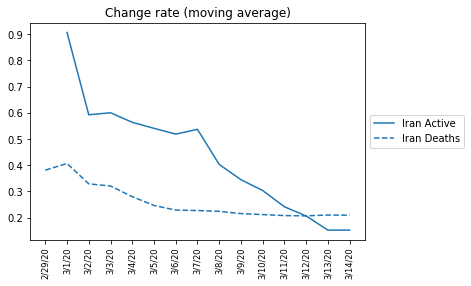

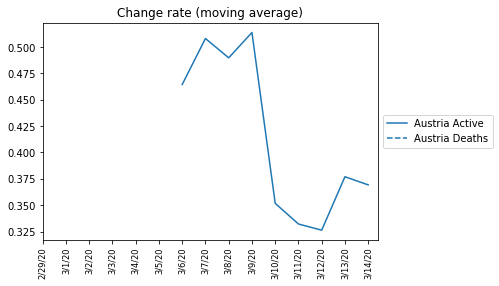

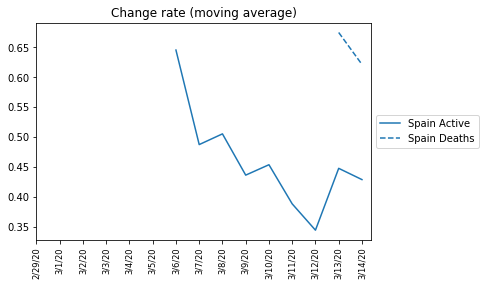

In [113]:
for country in countries:
    ts = all[country]["Active Rate Avg"].tail(number_of_days)
    pl = ts.plot(label=country+" Active")
    
    # Get color of last plot
    cl = plt.gca().lines[-1].get_color()
    
    ts = all[country]["Deaths Rate Avg"].tail(number_of_days)
    ts.plot(label=country+" Deaths", linestyle='dashed', color=cl)

    plt.title("Change rate (moving average)")
    plt.xticks(np.arange(number_of_days), all[country].tail(number_of_days).index.tolist(), 
               fontsize='small', rotation='vertical')

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.show()